## Results

Notebook to clean up, organize, analyze, and visualize results from Notebook 4

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import networkx as nx

In [13]:
df1 = pd.read_csv('candidates.csv')
#print(df1.shape)
df2 = pd.read_csv('marginal.csv')
#print(df2.shape)
#print(df1.shape[0] - df2.shape[0]) # diff should be size of development set, since no marginal probabilities for those

In [14]:
result = pd.merge(df1, df2, on = 'id')
#print(result.shape)
#result.to_csv('result.csv', index=False)

In [15]:
result['virus'] = result['virus'].apply(lambda x: x.strip())
result['host'] = result['host'].apply(lambda x: x.strip())

In [16]:
# viruses - fix names
result.replace('West Nile [vV]irus|WEST NILE VIRUS', 'WNV', inplace=True, regex=True)
result.replace('West Nile', 'WNV', inplace=True)
result.replace('TBE virus', 'TBEV', inplace=True)
result.replace('tick  borne encephalitis virus', 'TBEV', inplace=True)
result.replace('tick  borne encephalitis', 'TBEV', inplace=True)
result.replace('Tick  Borne Encephalitis Virus', 'TBEV', inplace=True)
result.replace('TBE', 'TBEV', inplace=True)
result.replace('Usutu virus', 'USUV', inplace=True)
result.replace('Japanese encephalitis', 'JEV', inplace=True)
result.replace('Japanese encephalitis virus', 'JEV', inplace=True)
result.replace('Zika virus', 'ZIKV', inplace=True)
result.replace('louping ill virus', 'LIV', inplace=True)
result.replace('dengue|Dengue|DENV virus', 'DENV', inplace=True, regex=True)
result.replace('SLE virus', 'SLEV', inplace=True, regex=True)
# hosts
result.replace('Human|humans', 'human', inplace=True, regex=True)
result.replace('Monkey|monkeys', 'monkey', inplace=True, regex=True)
result.replace('mice|Mice', 'mouse', inplace=True, regex=True)
result.replace('pig|pigs|Pig|Pigs', 'swine', inplace=True, regex=True)
result.replace('Chicken|chickens', 'chicken', inplace=True, regex=True)
result.replace('Sheep', 'sheep', inplace=True, regex=True)

In [17]:
# filter by positively predicted candidates (probability at least 51%)
positive = result[result['probability_positive'] >= 0.51]
#print(positive.shape) # approx num of positive candidates

In [18]:
positive.sort_values(by = 'probability_positive').head()

,id,virus,host,probability_positive
4200,4631,DENV,monkey,0.518614
1837,1838,bluetongue virus,sheep,0.519120
3487,3488,WNF,white stork,0.519120
4201,4632,ZIKV,monkey,0.519747
3826,4257,WNV,common kingfisher,0.522838


In [19]:
#positive['virus'].value_counts()
#positive['host'].value_counts()

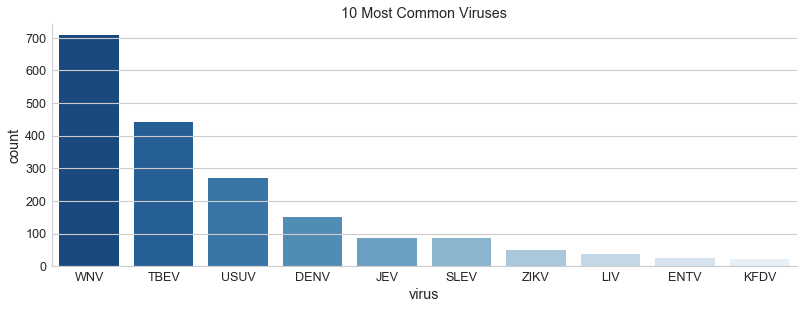

In [20]:
g = sns.catplot(x="virus", kind="count", data=positive, order=pd.value_counts(positive['virus']).iloc[:10].index, palette="Blues_r")
g.fig.set_size_inches(12,4)
axes = g.axes.flatten()
axes[0].set_title("10 Most Common Viruses")
plt.show()

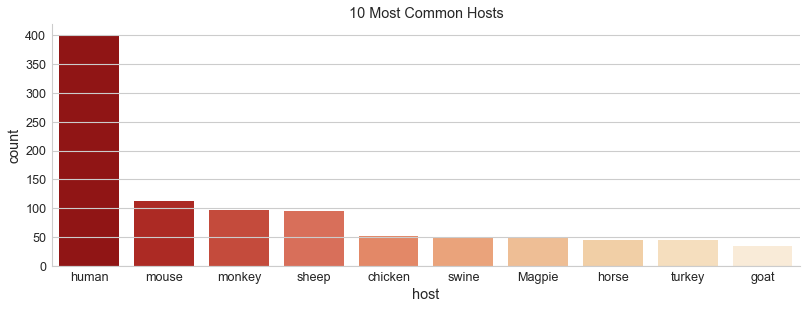

In [21]:
g = sns.catplot(x="host", kind="count", data=positive, order=pd.value_counts(positive['host']).iloc[:10].index, palette='OrRd_r')
g.fig.set_size_inches(12,4)
axes = g.axes.flatten()
axes[0].set_title("10 Most Common Hosts")
plt.show()

# Future data viz graphs to make:
- Network analysis graph (nodes = viruses connected by hosts in common)
- Correlations btwn viruses (depend on how many host sin common); pairplot; heatmap w virus on one axis and host on another axis
- Stacked bar plot of virus count (each bar divided by hosts names)
- Bar plot of negative relations
